## ETAPA 1: Resolver a dinâmica temporal das ondas em uma corda.

Equação de ondas na corda é dada por $\frac{\partial ^2 y}{\partial t^2}=c^2\frac{\partial ^2 y}{\partial x^2}$, sendo $y(x,t)$ o deslocamento vertical da corda.
Através da técnica de separação de variáveis, encontramos no domínio dos complexos que $y_n(x,t)=e^{i\omega _n t}f_n(x)$, sendo que o índice n foi adicionado já para indicar os modos normais discretos devido às condições de contorno $y(0,t)=y(L,t)=0$ nas bordas x=0 e x=L da corda.

As frequências e autofunções $f_n(x)$ podem ser obtidas numericamente pela técnica de diferenças
finitas, descrevendo-se o operador $\partial ^2 / \partial ^2 _n$ na forma matricial vista em aula. Destes, a solução geral das ondas na corda é

$$y(x,t)=\sum _n a_n e^{i\omega _n t}f_n(x)$$

Sendo que os coeficientes são definidos a partir da condição inicial $y_0(x)=y(x,0)$.

Sugestões: (1) Considere uma distorção inicial gaussiana com velocidade zero, mas teste outras
configurações também. (2) Considere L = c = 1, pois desta forma os resultados são dados tais que as
distâncias são medidas em unidades de L e o tempo em unidades de L/c.

#### Exercícios teóricos: reveja as aulas, pois já fizemos boa parte lá.

1) Mostre que o ansatz acima para y(x,t) satisfaz a equação de ondas.

2) Expresse os coeficientes $a_n$ em termos de $y_0(x)$.

3) E se quisermos considerar a corda com uma velocidade inicial finita? Ou seja $\dot y(x,t)|_{t=0}\ne 0$. O que muda? Veja o Moysés vol. 2 (página 105)

#### 1)
$$y(x,t)=\sum _n a_n e^{i\omega _n t}f_n(x)$$

$$\frac{\partial ^2 y}{\partial t^2}= \sum _n [a_n f_n(x)](-\omega _n ^2)e^{i\omega _n t}$$

$$\frac{\partial ^2 y}{\partial x^2}=\sum _n [a_n e^{i\omega _n t}]f_n^{''}(x)$$

Logo, $$\frac{\partial ^2 y}{\partial t^2}=c^2\frac{\partial ^2 y}{\partial x^2} \Rightarrow c^2=\frac{(-\omega _n ^2)f_n(x)}{f_n^{''}(x)} \Rightarrow -(c\omega _n)^2= \frac{f_n(x)}{f_n^{''}(x)}$$

Sendo que $f_n^{''}(x)=-(\omega _n/c)^2 f_n(x)$, logo:
$$-(c\omega _n)^2= \frac{f_n(x)}{-(\omega _n/c)^2 f_n(x)} \Rightarrow 1=1$$
Logo a ansatz satisfaz a equação de onda.  

#### 2)
$$y(x,t)=\sum _n a_n e^{i\omega _n t}f_n(x)$$ Sendo $$y_0(x)=y(x,0)$$
Logo: $$y_0(x)=y(x,0)=\sum _n a_n e^{i\omega _n 0}f_n(x)=\sum _n a_n f_n(x)$$
$$\sum_n a_n = y_0(x)\sum_n \frac{1}{f_n(x)}$$
Ou seja $$a_n=\int f_n(x)^† y_0(x)dx$$

#### 3)
$\dot y(x,0)\ne 0$, logo condiçôes iniciais: $$y(x,0)=y_0(x)$$ $$\frac{\partial y}{\partial t}(x,0)=y_1(x)$$

A solução geral depende das duas funções arbitrárias f e g, logo: $$y(x,t)=f(x-vt)+g(x+vt)$$

#### Exercícios numéricos:

1) Escolha um formato inicial para a corda $y_0(x)$. Seja criativo.

2) Calcule os coeficientes $a_n$. Na aula eu indiquei uma forma esperta de como fazer isso em python.

3) Defina uma função que receba o parâmetro tempo t (e possivelmente outros) e retorne $y(x,t)$.

4) Faça uma animação da corda vibrando a partir da condição inicial definida no item (1).

Estas questões estão todas contidas no código abaixo:

Obs: foi necessário instalar pacote ffmpeg no anaconda ("conda install -c conda-forge ffmpeg") para a parte da animação.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython.display as display
from IPython.display import HTML

#Valores iniciais
c=1 #Velocidade da onda
L=1 #Comprimento da corda
N = 100 #Número de pontos
dx = L/(N+1)

#Vetor para o formato inicial da onda(y0)
x = np.linspace(-2*np.pi,2*np.pi, N)
y0=[]
for i in range(0, N):
    y0.append(np.cos(x[i])**2)

#Construindo a matriz D2 NxN
m1=-np.eye(N, k=-1)
m2=-np.eye(N, k=1)
m3=2*np.eye(N, k=0)
m=m1+m2+m3

#Encontrando os autovalores e autovetores
autovalver=np.linalg.eigh(m)
beta=autovalver[0] #Autovalores
alpha=beta/dx*2
w=np.sqrt(alpha)*c 
V=autovalver[1] #Autovetores

#Encontrando o An
An = V.conj().T @ y0

#Definindo a função para a evolução temporal
yt = lambda t: (An*np.exp(-1j*w*t) @ V.conj().T).real

#Animação da corda vibrando
fps=60
tempo=2
frames=fps*tempo
plt.style.use('dark_background')
t=np.linspace(0, 2, frames, endpoint=False)
plt.ioff()

fig, ax = plt.subplots()
corda, =ax.plot([])
ax.set_xlim(-2, 2)
ax.set_ylim(0, 1)

def animate(it):
    corda.set_data((x, yt(t[it])))
    return corda

anim= animation.FuncAnimation(fig, animate, frames=len(t), interval=1000/fps)

video = anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()
plt.ion();

## ETAPA 2: Propagação de pacotes eletrônicos na equação de Schrödinger. Reveja a aula, há dicas e ilustração da implementação lá.

Nas unidades atômicas, a equação de Schrödinger é

$$i\frac{\partial}{\partial t}\psi (x,t)=[H_k +V(x)]\psi (x,t),$$ sendo $H_k = -\frac{1}{2}\frac{\partial ^2}{\partial x^2}$

Formalmente, a solução da dinâmica pode ser escrita como

$$\psi (x,t)=e^{-i(H_k + V)t}\psi (x,0)$$

Porém, calcular a exponencial dos operadores não é trivial. Em aula, vimos que o método split-step
facilita este processo ao separar a exponencial em um termo que só depende de e outro que só
depende de $p=-i\partial /\partial x$, tal que podemos escrever

$$\psi (x,t+\Delta t) \approx e^{-iV\Delta t/2} e^{-iH_k \Delta t}e^{-iV\Delta t/2}\psi (x,t)$$

Uma implementação eficiente desta aproximação requer que atuemos os termos com no espaço x
e os termos no espaço k, alternando entre os espaços via FFT. Assim, fazemos

$$\psi (x,t+\Delta t) \approx e^{-iV\Delta t/2} F^{-1} \{ e^{-iH_k \Delta t}F[e^{-iV\Delta t/2}\psi(x,t)]\}$$

Nos seus respectivos espaços, as exponenciais dos operadores é sempre diagonal e trivial de calcular.

#### Implementação

Considere um sistema de largura L = 200, com o eixo x discretizado em N = 200 pontos ou mais.

Considere o pacote inicial $\psi(x,0) = exp[-\frac{1}{2}(x-x_0)/l)^2]exp[ik_0x]$, com centro $x_0=-50$, largura $l=5$ e velocidade inicial $k_0=1$

Considere um potencial de espalhamento $V(x)=v_0 exp[-\frac{1}{2}(x/\gamma)^2]$ com largura $\gamma = 2$ e varie a intensidade de $v_0=0$ até 2 para ver como o resultado muda.

Considere o intervalo de tempo 0 < t < 200 com pelo menos 400 pontos.

Aplique o método split-step acima para calcular a evolução do pacote de ondas e reproduza a figura ao lado.
 
Faça também uma animação do pacote colidindo com a barreira de potencial.

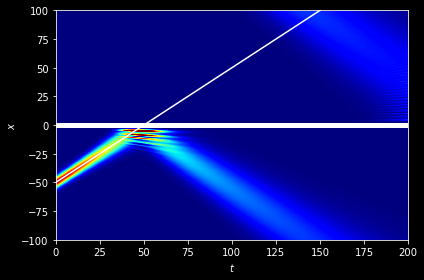

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

#Condições iniciais
L=200 #largura do sistema
N=200 #número de pontos
x=np.linspace(-L/2, L/2, N, endpoint=False) #eixo x
dx=x[1]-x[0]

#Pacote inicial psi(x, 0)
x0=-50 #centro
l=5 #largura
k0=1 #velocidade inicial
psi0 = np.exp(-(1/2)*((x-x0)/l)**2) * np.exp(1j*k0*x)

#Potencial de espalhamento V(x)
gama=2 #largura
v0=2 #intensidade
V = v0*np.exp(-(1/2)*(x/gama)**2)

#Intervalo de tempo 0<t<200 com 400 pontos
t = np.linspace(0, 200, 400)
dt=t[1]-t[0]

#Método split-step
k=fft.fftfreq(N)*2*np.pi/dx
Hk=(1/2)*(k**2)
Hv=v0*V

def splitstep(p):
    p=fft.fft(p*np.exp(-1j*Hv*dt/2))
    p=fft.ifft(p*np.exp(-1j*Hk*dt))
    p=p*np.exp(-1j*Hv*dt/2)
    return p

psit=np.zeros([len(t), len(psi0)], dtype=complex)
psit[0]=psi0

for it in range(1, len(t)):
    psit[it]=splitstep(psit[it-1])


#Plotagem do gráfico
plt.imshow(np.abs(psit.T)**2, aspect='auto', origin='lower', cmap='jet',
           extent=[t[0],t[-1], x[0], x[-1]], vmax=1)
plt.plot(t, x0+k0*t, c='white')
plt.axhline(0, c='white', lw=5)
plt.ylim(-L/2, L/2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.tight_layout()
plt.show()